In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt  # Pour l'affichage d'images
%matplotlib inline

# Load the 5 families dataset

In [2]:
csv_5fam = "/Users/Adrien/DataScientist/projet_Mushroom/reduced_dataset_5_families_with_genus.csv"
df = pd.read_csv(csv_5fam)
df.head()

,image_id,image_url,genus,family,filepath,label
0,28,http://mushroomobserver.org/images/320/28,Inocybe,Inocybaceae,/Users/Adrien/DataScientist/projet_Mushroom/im...,0
1,86,http://mushroomobserver.org/images/320/86,Strobilurus,Physalacriaceae,/Users/Adrien/DataScientist/projet_Mushroom/im...,3
2,87,http://mushroomobserver.org/images/320/87,Strobilurus,Physalacriaceae,/Users/Adrien/DataScientist/projet_Mushroom/im...,3
3,126,http://mushroomobserver.org/images/320/126,Rhodocollybia,Omphalotaceae,/Users/Adrien/DataScientist/projet_Mushroom/im...,1
4,128,http://mushroomobserver.org/images/320/128,Rhodocollybia,Omphalotaceae,/Users/Adrien/DataScientist/projet_Mushroom/im...,1


## Extract each family

In [3]:
df_label0 = df[df["family"] == 'Inocybaceae']
df_label0 = df_label0.reset_index(drop=True)
df_label1 = df[df["family"] == 'Omphalotaceae']
df_label1 = df_label1.reset_index(drop=True)
df_label2 = df[df["family"] == 'Fomitopsidaceae']
df_label2 = df_label2.reset_index(drop=True)
df_label3 = df[df["family"] == 'Physalacriaceae']
df_label3 = df_label3.reset_index(drop=True)
df_label4 = df[df["family"] == 'Marasmiaceae']
df_label4 = df_label4.reset_index(drop=True)

In [4]:
print("famille 1:", df_label0.shape)
print("famille 2:", df_label1.shape)
print("famille 3:", df_label2.shape)
print("famille 4:", df_label3.shape)
print("famille 5:", df_label4.shape)

famille 1: (3914, 6)
famille 2: (3816, 6)
famille 3: (3197, 6)
famille 4: (3168, 6)
famille 5: (3042, 6)


## Famille 1: Cellule pour ne conserver que les genres ayant plus de 100 images !

- En plus, on en profite pour remettre l'index à 0,
- Renommer la colonne label en label_family (evite les confusions) !
- Et ajuster le label pour qu'il soit propre à chaque genre !

Attention ! ne faire tourner cette cellule qu'une seule fois !

### fonction pour avoir les genres avec plus de 100 images --> get_gender(dataframe)

### fonction pour modifier les df --> update_df_label(df, liste1)

In [5]:
## Regardons les genres qui possèdent plus de 100 images !!
def get_gender(dataframe):
    df_genus = dataframe.groupby(dataframe['genus']).size().sort_values(ascending = False)
    df_genus = df_genus[dataframe.groupby(dataframe['genus']).size().sort_values(ascending = False) > 100]
    #display(df_genus)

    liste1 = []
    for x in range(len(df_genus)):
        liste1.append(df_genus.index[x])

    return liste1

def update_df_label(df, liste1):
    df = df[df['genus'].isin(liste1)]
    df = df.reset_index(drop=True)
    df = df.rename(columns={'label': 'label_family'})
    df['label'] = df['genus'].replace(liste1,list(range(len(liste1))))
    return df

### on travaille avec les fonctions définies :

In [6]:
## Famille 1 --> df_label0
print("la shape originale est de :", df_label0.shape)
liste1 = get_gender(df_label0)
df_label0 = update_df_label(df_label0, liste1)
print("vérification de la suppression de lignes :", df_label0.shape, "\n")

## Famille 2 --> df_label1
print("la shape originale est de :", df_label1.shape)
liste1 = get_gender(df_label1)
df_label1 = update_df_label(df_label1, liste1)
print("vérification de la suppression de lignes :", df_label1.shape, "\n")

## Famille 3 --> df_label2
print("la shape originale est de :", df_label2.shape)
liste1 = get_gender(df_label2)
df_label2 = update_df_label(df_label2, liste1)
print("vérification de la suppression de lignes :", df_label2.shape, "\n")

## Famille 4 --> df_label3
print("la shape originale est de :", df_label3.shape)
liste1 = get_gender(df_label3)
df_label3 = update_df_label(df_label3, liste1)
print("vérification de la suppression de lignes :", df_label3.shape, "\n")

## Famille 5 --> df_label4
print("la shape originale est de :", df_label4.shape)
liste1 = get_gender(df_label4)
df_label4 = update_df_label(df_label4, liste1)
print("vérification de la suppression de lignes :", df_label4.shape, "\n")

la shape originale est de : (3914, 6)
vérification de la suppression de lignes : (3823, 7) 

la shape originale est de : (3816, 6)
vérification de la suppression de lignes : (3483, 7) 

la shape originale est de : (3197, 6)
vérification de la suppression de lignes : (3006, 7) 

la shape originale est de : (3168, 6)
vérification de la suppression de lignes : (2873, 7) 

la shape originale est de : (3042, 6)
vérification de la suppression de lignes : (2570, 7) 



## Save csv files with appropriated dataset

In [82]:
df_label0.to_csv('dataset_label0_Inocybaceae.csv', index = False)
df_label1.to_csv('dataset_label1_Omphalotaceae.csv', index = False)
df_label2.to_csv('dataset_label2_Fomitopsidaceae.csv', index = False)
df_label3.to_csv('dataset_label3_Physalacriaceae.csv', index = False)
df_label4.to_csv('dataset_label4_Marasmiaceae.csv', index = False)

### Load files if needed

In [19]:
csv_label0 = "/Users/Adrien/DataScientist/projet_Mushroom/dataset_label0_Inocybaceae.csv"
csv_label1 = "/Users/Adrien/DataScientist/projet_Mushroom/dataset_label1_Omphalotaceae.csv"
csv_label2 = "/Users/Adrien/DataScientist/projet_Mushroom/dataset_label2_Fomitopsidaceae.csv"
csv_label3 = "/Users/Adrien/DataScientist/projet_Mushroom/dataset_label3_Physalacriaceae.csv"
csv_label4 = "/Users/Adrien/DataScientist/projet_Mushroom/dataset_label4_Marasmiaceae.csv"


df_label0 = pd.read_csv(csv_label0)
df_label1 = pd.read_csv(csv_label1)
df_label2 = pd.read_csv(csv_label2)
df_label3 = pd.read_csv(csv_label3)
df_label4 = pd.read_csv(csv_label4)

# plot Genus repartition

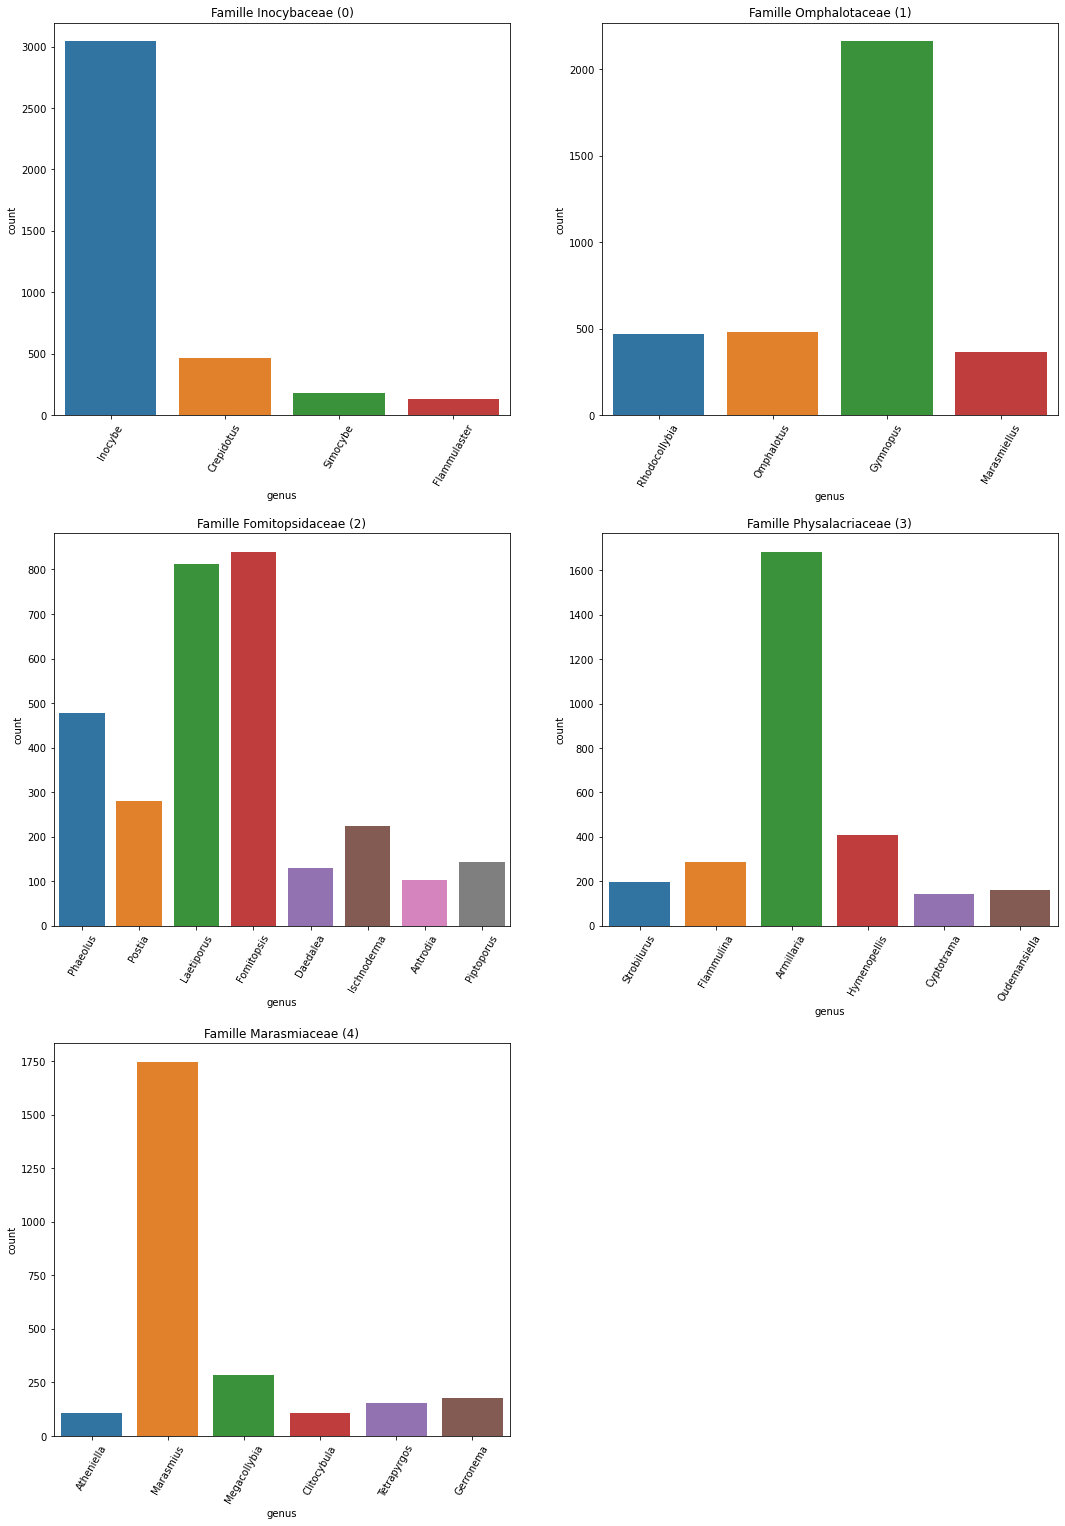

In [33]:
plt.figure(figsize=(18, 26))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.subplot(321)
sns.countplot(x= "genus", data=df_label0)
plt.title("Famille Inocybaceae (0)")
plt.xticks(rotation = 60);
plt.subplot(322)
sns.countplot(x= "genus", data=df_label1)
plt.title("Famille Omphalotaceae (1)")
plt.xticks(rotation = 60);
plt.subplot(323)
sns.countplot(x= "genus", data=df_label2)
plt.title("Famille Fomitopsidaceae (2)")
plt.xticks(rotation = 60);
plt.subplot(324)
sns.countplot(x= "genus", data=df_label3)
plt.title("Famille Physalacriaceae (3)")
plt.xticks(rotation = 60);
plt.subplot(325)
sns.countplot(x= "genus", data=df_label4)
plt.title("Famille Marasmiaceae (4)")
plt.xticks(rotation = 60);

In [87]:
liste1 = get_gender(df_label0)
print("label0 :", liste1)
liste1 = get_gender(df_label1)
print("label1 :", liste1)
liste1 = get_gender(df_label2)
print("label2 :", liste1)
liste1 = get_gender(df_label3)
print("label3 :", liste1)
liste1 = get_gender(df_label4)
print("label4 :", liste1)

label0 : ['Inocybe', 'Crepidotus', 'Simocybe', 'Flammulaster']
label1 : ['Gymnopus', 'Omphalotus', 'Rhodocollybia', 'Marasmiellus']
label2 : ['Fomitopsis', 'Laetiporus', 'Phaeolus', 'Postia', 'Ischnoderma', 'Piptoporus', 'Daedalea', 'Antrodia']
label3 : ['Armillaria', 'Hymenopellis', 'Flammulina', 'Strobilurus', 'Oudemansiella', 'Cyptotrama']
label4 : ['Marasmius', 'Megacollybia', 'Gerronema', 'Tetrapyrgos', 'Atheniella', 'Clitocybula']
